# STAR WARS SURVEY
In this project we will be cleaning and exploring the data set ["star_wars.csv"](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv) collected by 
the team FiveThirtyEight. They surveyed Star Wars fans using the online tool SurveyMonkey 
and received 835 total responses. The data has several columns containing answers to questions 
about the Star Wars movies.
We will tackle the following issues first and then look for answer to some questions:
* Rename the columns by assigning them more meaningful names.
* Clean and change the format/type of the certain columns to make the analysis easier.
* Find the rating of each star wars episode and based on respondent preferences.
* How many people have watched each movie in the series?
* Are there differences between genders?
* See the differences between the Star War fans and non-fans 
* Variability in each education category
* Favoribility of top Star Wars movie characters



In [1]:
#Import the packages and read the survey data into pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Package to convert integers to Roman numerals
import roman
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
# Check column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
# Clean missing data
star_wars=star_wars[star_wars['RespondentID'].notnull()]

In [5]:
star_wars['RespondentID'].isnull().sum()

0

In [6]:
# Convert the data type to Boolean by using Series.map method
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True,'No':False})

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True,'No':False})

1        True
2         NaN
3       False
4        True
5        True
        ...  
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [8]:
# Replace column names by more meaningful ones
old_cols=star_wars.columns[3:9]
new_cols=['seen_'+str(i-2) for i in range(3,9)]
mapp=dict(zip(old_cols,new_cols))
star_wars.rename(columns=mapp,inplace=True)
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [9]:
# Convert the data type to Boolean by using df.applymap method
star_wars[new_cols]=star_wars[new_cols].applymap(lambda x: True if 'Star Wars: Episode' in str(x) else False )
   

In [10]:
star_wars['seen_1'].value_counts(dropna=False)

True     673
False    513
Name: seen_1, dtype: int64

In [11]:
# Investigate the column names
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [12]:
# Inspect data
star_wars['Unnamed: 14'].value_counts(dropna=False)

NaN    350
2      232
3      220
1      146
6      145
4       57
5       36
Name: Unnamed: 14, dtype: int64

In [13]:
# Replace column names by more meaningful ones
old_cols=star_wars.columns[9:15]
new_cols=['rating_'+str(i-8) for i in range(9,15)]
mapp=dict(zip(old_cols,new_cols))
star_wars.rename(columns=mapp,inplace=True)
star_wars.columns[9:15]

Index(['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5', 'rating_6'], dtype='object')

In [14]:
# Reverse the ranking to rating
star_wars[new_cols]=7-star_wars[new_cols].astype(float)

In [15]:
# Inspect data
star_wars['rating_6'].value_counts(dropna=False)

NaN    350
5.0    232
4.0    220
6.0    146
1.0    145
3.0     57
2.0     36
Name: rating_6, dtype: int64

In [16]:
# Compute the mean of the columns containing ratings
ranks=star_wars[new_cols].mean()


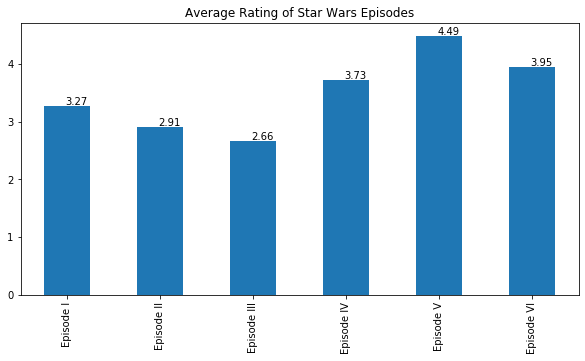

In [17]:
# Plot the bar graph of average ratings
ax=ranks.plot(kind='bar')
xticks_lst=['Episode '+roman.toRoman(i-8) for i in range(9,15)]
ax.set_xticklabels(xticks_lst, rotation=90)
plt.title('Average Rating of Star Wars Episodes')
plt.gcf().set_size_inches(10, 5)
x_offset = -0.02
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

It is salient that Episode V is has the highest rating and most watched movie of the whole
Star Wars series.

In [18]:
# Examine the dataframe column names related to respondent answers 
# to the question : ' Did you see the movie?'
cols=star_wars.columns[3:9]
cols

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [19]:
# Calculate the sum of columns to find out how many people watched each episode.
sums_seen=star_wars[cols].sum()
sums_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

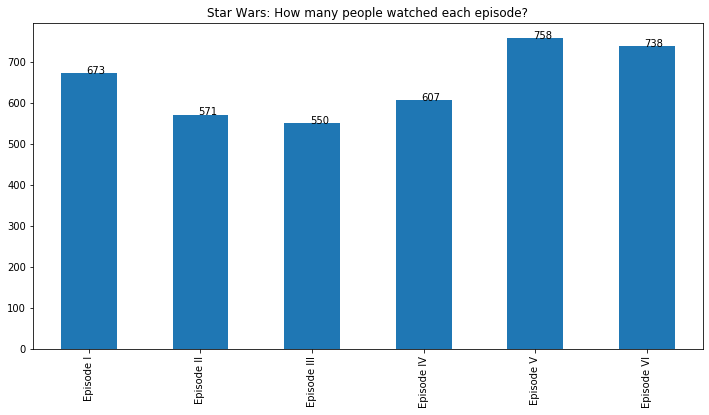

In [20]:
# Bar graph of 'How many people watched each episode?'
ax=sums_seen.plot(kind='bar')
xticks_lst=['Episode '+roman.toRoman(i-8) for i in range(9,15)]
ax.set_xticklabels(xticks_lst, rotation=90)
plt.title('Star Wars: How many people watched each episode?')
plt.gcf().set_size_inches(12, 6)
x_offset = -0.02
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

Text(0.5, 1.0, 'Episode Watched By Gender')

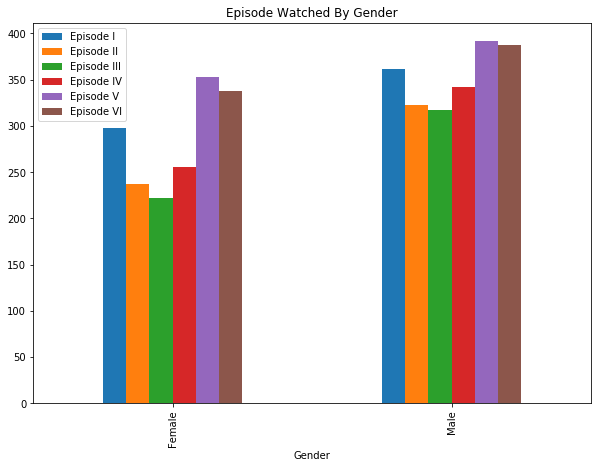

In [21]:
# Bar graph visualizing 'Episodes Watched By Gender'
cols=star_wars.columns[3:9]
ax=star_wars.groupby('Gender')[cols].agg(np.sum).plot(kind='bar')
xticks_lst=['Episode '+roman.toRoman(i-8) for i in range(9,15)]
ax.legend(xticks_lst)
plt.gcf().set_size_inches(10, 7)
# plt.legend(loc="upper right")
plt.title('Episode Watched By Gender')

Text(0.5, 1.0, 'Episode Ratings By Gender')

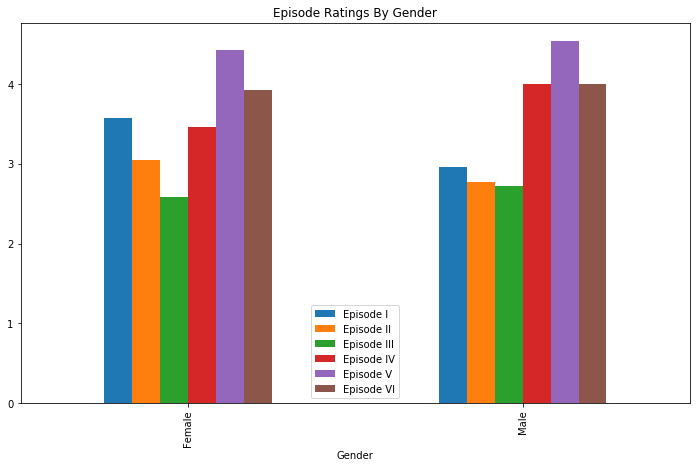

In [22]:
# Bar plot of ratings among genders
cols=star_wars.columns[9:15]
ax=star_wars.groupby('Gender')[cols].agg(np.mean).plot(kind='bar')

plt.gcf().set_size_inches(12, 7)
# plt.legend(loc="upper right")
ax.legend(xticks_lst)
plt.title('Episode Ratings By Gender')

Text(0.5, 1.0, 'Star War Ratings: Fan vs Non-Fan')

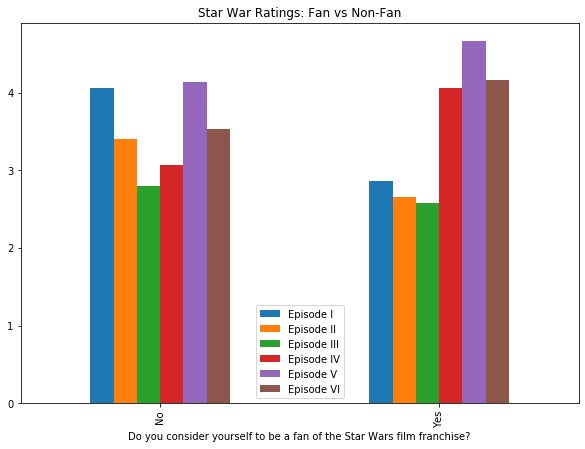

In [23]:
# The differences between fan and non-fan ratings
cols=star_wars.columns[9:15]
ax=star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')[cols].agg(np.mean).plot(kind='bar')
plt.gcf().set_size_inches(10, 7)
# plt.legend(loc="upper right")
ax.legend(xticks_lst)
plt.title('Star War Ratings: Fan vs Non-Fan')


Among the non-fan group first two episode ratings are quite higher compared to fans.
It is noteworthy that  female and non-fan responses look very similar. It is likely to be due to
the fact that many of the female are non-fans.

In [24]:
# Distribution of the education level of respondents
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [25]:
# Average of ratings among each education category
cols=star_wars.columns[9:15]
Ratings_by_edu=star_wars.groupby('Education')[cols].agg(np.mean)
Ratings_by_edu

,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6
Education,,,,,,
Bachelor degree,3.171756,2.709924,2.478927,3.885496,4.690840,4.068702
Graduate degree,3.177778,2.774336,2.500000,3.800885,4.676991,4.079646
High school degree,3.197183,3.253521,2.873239,3.788732,4.126761,3.760563
Less than high school degree,2.000000,1.666667,3.333333,4.333333,6.000000,3.666667
Some college or Associate degree,3.448819,3.114173,2.897638,3.496063,4.216535,3.826772


Text(0.5, 1.0, 'Rating Trends by Education')

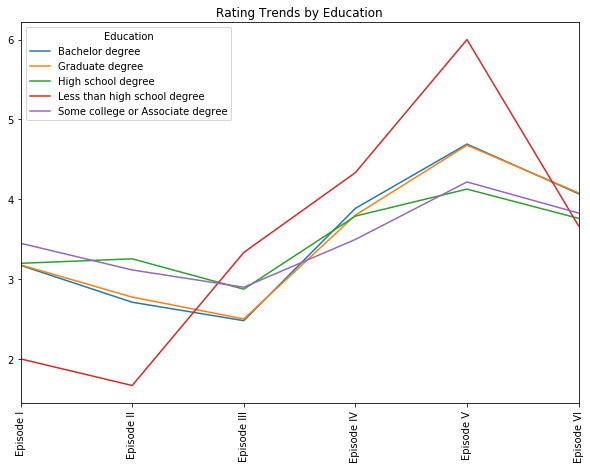

In [26]:
# The graph of Rating Trends by Education
ax=Ratings_by_edu.T.plot()
xticks_lst=['Episode '+roman.toRoman(i-8) for i in range(9,15)]
ax.set_xticklabels(xticks_lst, rotation=90)
plt.gcf().set_size_inches(10, 7)
plt.title('Rating Trends by Education')


The dissimilarity in 'Less than high school degree' groups is noticable. 
For all participants in this education category, Episode V is their first preference.
This observation is quite striking.

In [27]:
# Column names related to notable movie characters
star_wars.iloc[:,15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [28]:
# Rename column names relavant to characters favorability so that they make more sense 
characters=['Darth Vader','Han Solo','Princes Leia Organa','Obi-Wan Kenobi',
            'Yoda','R2-D2','C-3P0','Anakin Skywalker','Dart Wader',
            'Lando Calrissian','Padme Amidala','Boba Fett','Emperor Palpatine','Jar Jar Binks']
star_wars.rename(columns=dict(zip(star_wars.columns[15:29],characters)),inplace=True)
star_wars.iloc[:,15:29].head()

,Darth Vader,Han Solo,Princes Leia Organa,Obi-Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Dart Wader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [29]:
# Compute occurence of unique answers along character favorability columns
# and assign it to a dataframe called 'chars'
chars=star_wars.iloc[:,15:29].apply(lambda col: col.value_counts())

# find proportion of each answer for each character
popularity=chars/chars.sum()

Text(0.5, 1.0, 'Popularity by Character')

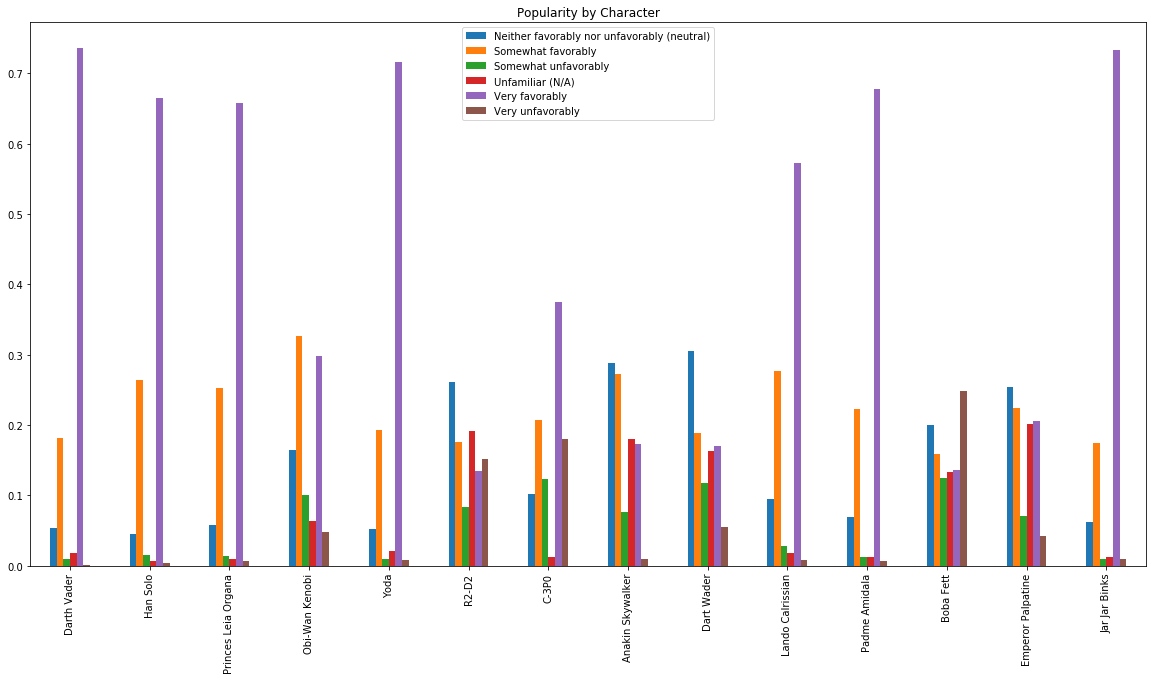

In [30]:
# Bar plot of favorability rating of Star Wars characters
ax=popularity.T.plot(kind='bar')
# xticks_lst=['Episode '+roman.toRoman(i-8) for i in range(9,15)]
# ax.set_xticklabels(xticks_lst, rotation=90)
plt.gcf().set_size_inches(20, 10)
plt.title('Popularity by Character')

From the distribution of favoribility proportions, Darth Vader turns out to be the most liked character. Boba Fett is by far  the most unfavorable one since with his customized Mandalorian armor, deadly weaponry, and silent demeanor, he was one of the most feared bounty hunters in the galaxy.